In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [20]:
train_dir = r"C:\Users\APPLE\Documents\Soumya\Data Analyst\Medical Diagnosis AI\train"
val_dir = r"C:\Users\APPLE\Documents\Soumya\Data Analyst\Medical Diagnosis AI\val"
test_dir = r"C:\Users\APPLE\Documents\Soumya\Data Analyst\Medical Diagnosis AI\test"

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

Found 5216 images belonging to 2 classes.


In [24]:
val_data = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 16 images belonging to 2 classes.


In [25]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 624 images belonging to 2 classes.


In [26]:
# Print class indices to verify correct labeling
print("Class indices:", train_data.class_indices)

Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}


In [27]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


C:\Users\APPLE\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    verbose=1
)

C:\Users\APPLE\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 611ms/step - accuracy: 0.7371 - loss: 0.6486 - val_accuracy: 0.5000 - val_loss: 1.6309
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 588ms/step - accuracy: 0.7824 - loss: 0.4484 - val_accuracy: 0.6250 - val_loss: 0.7170
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 565ms/step - accuracy: 0.8559 - loss: 0.3340 - val_accuracy: 0.7500 - val_loss: 0.5105
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 558ms/step - accuracy: 0.8836 - loss: 0.2768 - val_accuracy: 0.7500 - val_loss: 0.7928
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 618ms/step - accuracy: 0.8905 - loss: 0.2473 - val_accuracy: 0.6875 - val_loss: 0.7458
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 584ms/step - accuracy: 0.9003 - loss: 0.2417 - val_accuracy: 0.6875 - val_loss: 0.8260
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 582ms/step - accuracy: 0.8998 - loss: 0.2394 - val_accuracy: 0.7500 - val_loss: 0.5792
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 578ms/step - accuracy: 0.9142 - loss

Text(0.5, 1.0, 'Model Accuracy')

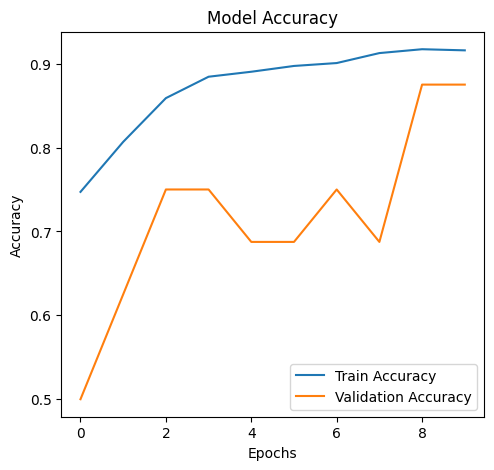

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

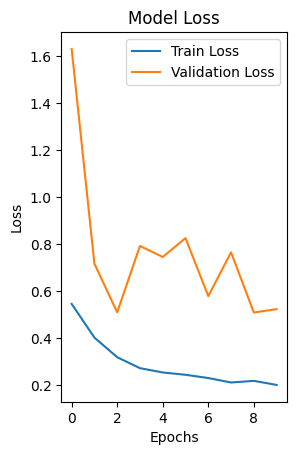

In [33]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

In [34]:
# Confusion Matrix & Classification Report
y_pred = model.predict(test_data)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_true = test_data.classes
conf_matrix = confusion_matrix(y_true, y_pred)

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 308ms/step


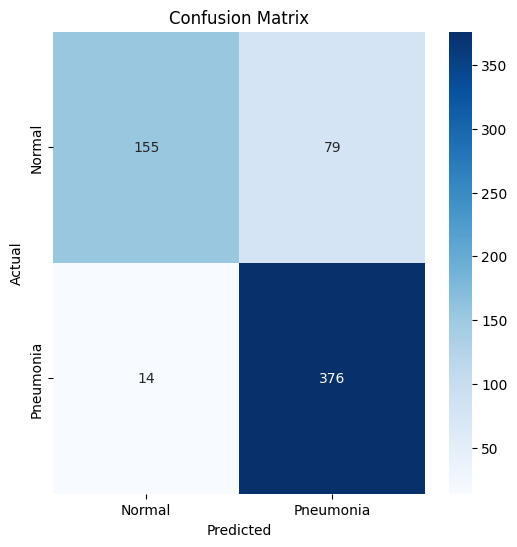

In [35]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
print(classification_report(y_true, y_pred, target_names=["Normal", "Pneumonia"]))

              precision    recall  f1-score   support

      Normal       0.92      0.66      0.77       234
   Pneumonia       0.83      0.96      0.89       390

    accuracy                           0.85       624
   macro avg       0.87      0.81      0.83       624
weighted avg       0.86      0.85      0.84       624

